In [1]:
install.packages('ada',repos='http://cran.us.r-project.org')
install.packages('adabag',repos='http://cran.us.r-project.org')
install.packages('ipred',repos='http://cran.us.r-project.org')
install.packages('randomForest',repos='http://cran.us.r-project.org')
install.packages('e1071',repos='http://cran.us.r-project.org')
install.packages('class',repos='http://cran.us.r-project.org')
install.packages('mlbench',repos='http://cran.us.r-project.org')
install.packages('prodlim',repos='http://cran.us.r-project.org')
install.packages('KernSmooth',repos='http://cran.us.r-project.org')
install.packages('survival',repos='http://cran.us.r-project.org')
install.packages('splines',repos='http://cran.us.r-project.org')
install.packages('caret',repos='http://cran.us.r-project.org')
install.packages('lattice',repos='http://cran.us.r-project.org')
install.packages('ggplot2',repos='http://cran.us.r-project.org')


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘mlbench’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘numDeriv’, ‘lava’, ‘prodlim’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“package ‘splines’ is not available (for R version 3.3.2)”Warning message:
“package ‘splines’ is 

In [11]:
require(adabag)
require(rpart)
source("prob.err.r")
data(iris)

In [14]:

names(iris)<-c("LS","AS","LP","AP","Species")
Itrain<-c(sample(1:50,25),sample(51:100,25),sample(101:150,25))
iris.bagging<-bagging(Species~.,data=iris[Itrain,],mfinal=10)

In [15]:
iris.bagging.pred<-predict.bagging(iris.bagging,
newdata=iris[-Itrain,])
iris.bagging.conf<-iris.bagging.pred$confusion
iris.bagging.conf
prob.err(iris.bagging.conf)

               Observed Class
Predicted Class setosa versicolor virginica
     setosa         25          0         0
     versicolor      0         24         1
     virginica       0          1        24

[1] 2.67

Iris son datos muy facilmente classificable
Pero vowel son muy malos

In [16]:
require(ElemStatLearn)
data(vowel.train)
data(vowel.test)
vowel.train$y<-factor(vowel.train$y)
vowel.test$y<-factor(vowel.test$y)
vowel.bagging <- bagging(y~ ., data=vowel.train,mfinal=10)

Loading required package: ElemStatLearn


In [18]:
vowel.bagging.pred<-predict.bagging(vowel.bagging,newdata=vowel.test)
vowel.bagging.conf<-vowel.bagging.pred$confusion
vowel.bagging.conf
prob.err(vowel.bagging.conf)

               Observed Class
Predicted Class  1  2  3  4  5  6  7  8  9 10 11
             1  31  0  0  0  0  0  0  0  0  1  0
             10  1  0  0  0  0  0  2  0  2 26  0
             11  0  3  7  1  0  9  0  0  0  0  4
             2   8 17  4  0  0  0  0  0  1  8  2
             3   2 10 11  4  0  0  3  0  0  0  1
             4   0  0  7 26  3  3  0  0  0  0  0
             5   0  0  0  4 21 18  9  0  0  0  0
             6   0  0  1  5 16  9  4  0  0  0  2
             7   0  0 12  1  2  2 21  7  6  0 20
             8   0  0  0  0  0  0  0 27 10  0  0
             9   0 12  0  1  0  1  3  8 23  7 13

[1] 85.06

adabag tiene problemas etiquetando la matriz de confusión no pone bien las filas i las columnas

In [24]:
Icorrect<-c(1,4,5,6,7,8,9,10,11,2,3)
vowel.bagging.conf<-vowel.bagging.conf[Icorrect,]
vowel.bagging.conf
prob.err(vowel.bagging.conf)

               Observed Class
Predicted Class  1  2  3  4  5  6  7  8  9 10 11
             1  31  0  0  0  0  0  0  0  0  1  0
             2   8 17  4  0  0  0  0  0  1  8  2
             3   2 10 11  4  0  0  3  0  0  0  1
             4   0  0  7 26  3  3  0  0  0  0  0
             5   0  0  0  4 21 18  9  0  0  0  0
             6   0  0  1  5 16  9  4  0  0  0  2
             7   0  0 12  1  2  2 21  7  6  0 20
             8   0  0  0  0  0  0  0 27 10  0  0
             9   0 12  0  1  0  1  3  8 23  7 13
             10  1  0  0  0  0  0  2  0  2 26  0
             11  0  3  7  1  0  9  0  0  0  0  4

[1] 53.25

In [25]:
vowel.bagging.pred$error

[1] 0.5324675

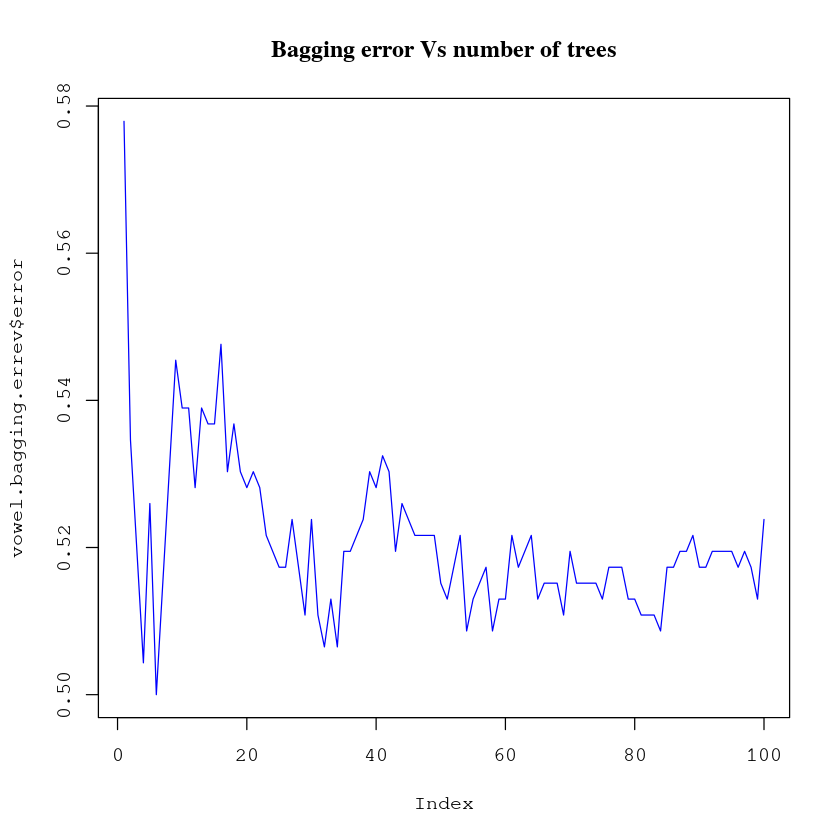

In [26]:
vowel.bagging <- bagging(y~ ., data=vowel.train,mfinal=100)
vowel.bagging.errev<-errorevol(vowel.bagging,vowel.test)
plot(vowel.bagging.errev$error, type="l",main="Bagging error Vs number of trees",col="blue")

## Random forest

In [28]:
require(randomForest)
require(ggplot2)
require(rpart)
data(iris)




In [29]:
iris.rf <- randomForest(Species ~ ., data=iris,importance=TRUE, proximity=TRUE)
print(iris.rf)


Call:
 randomForest(formula = Species ~ ., data = iris, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4.67%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          4        46        0.08


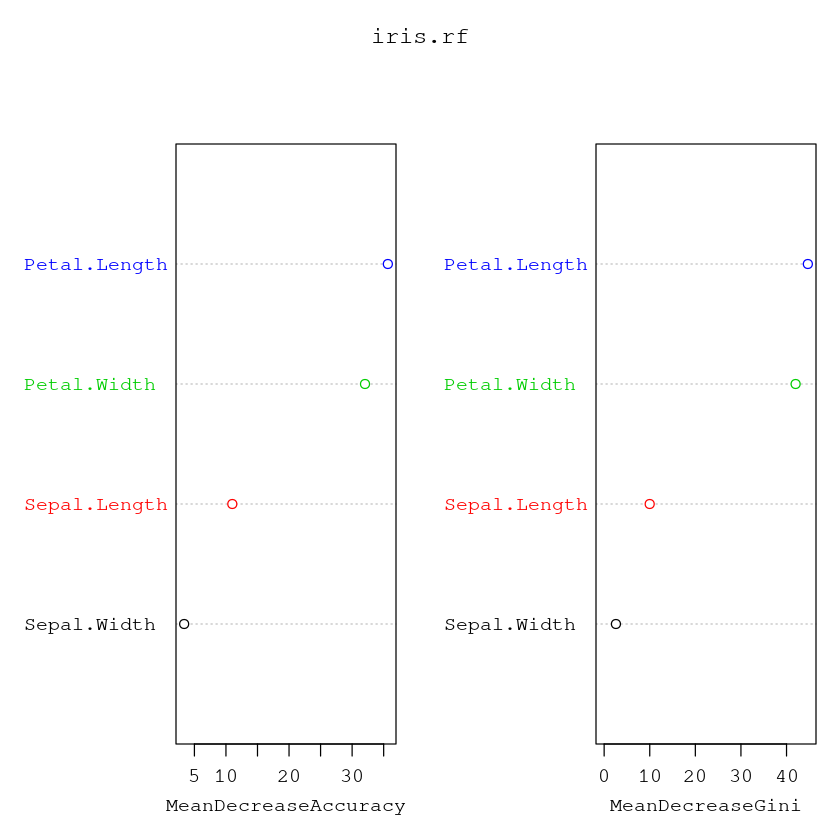

In [30]:
varImpPlot(iris.rf,col=c(1,2,3,4))

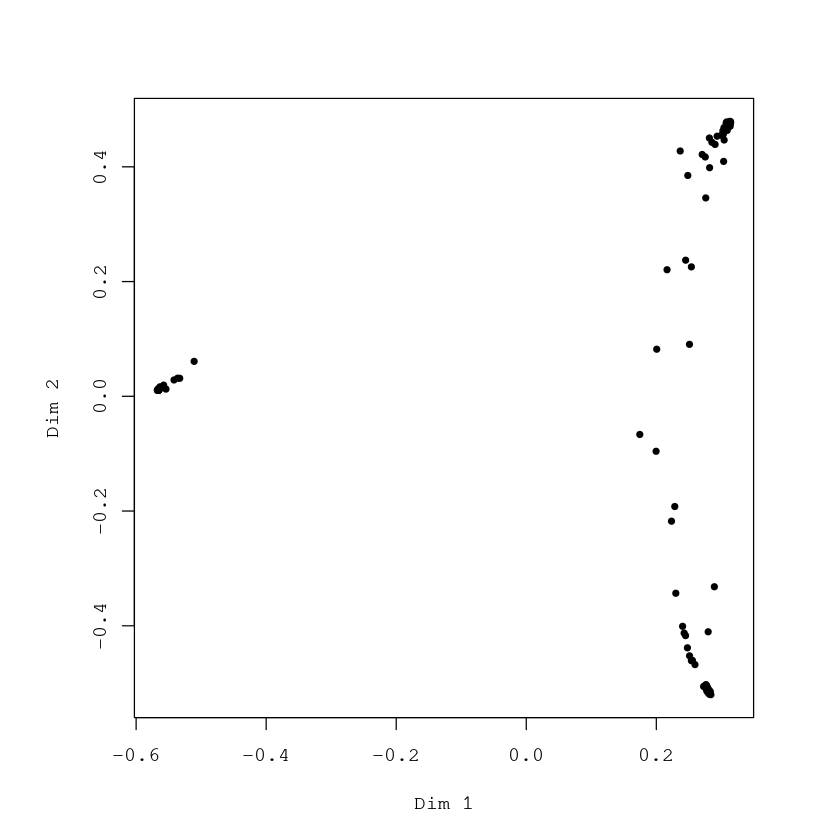

In [31]:
MDSplot(iris.rf,iris$Species,palette=rep(1,3))

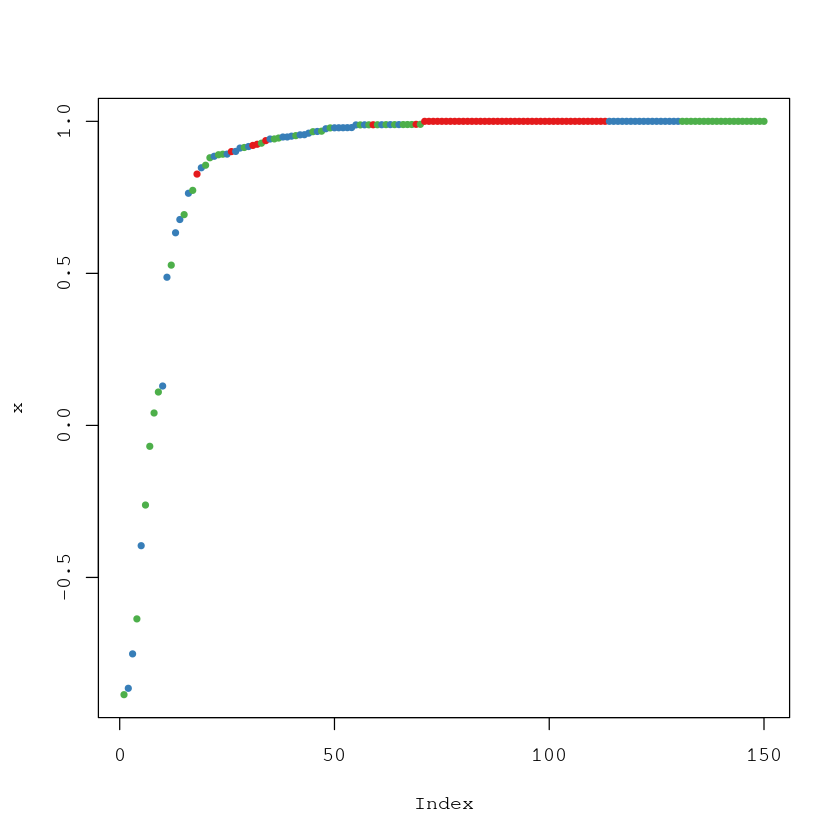

In [32]:
plot(margin(iris.rf))

In [33]:
importance(iris.rf)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,6.251477,7.3671454,8.718076,11.006529,9.988592
Sepal.Width,4.461725,-0.5869232,3.105930,3.374249,2.582449
Petal.Length,24.612770,35.8295572,29.425305,35.663728,44.675686
Petal.Width,20.082109,31.5589069,30.395254,32.041961,41.989820
